In [1]:
from sympy import diff, lambdify, symbols, sqrt, cos, numbered_symbols, simplify, S, init_printing
from scipy.integrate import odeint
import numpy as np
init_printing()

In [2]:
import rebound
import numpy as np

def make_sim(m_res):
    logmass = -5.1
    e0 = 1.e-4 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=10**logmass, e=e0, P=1.)
    sim.add(m=10**logmass, e=e0, P=(m_res+1)/m_res)
    sim.move_to_com()
    return sim

m_res=9
alpha = (m_res/(m_res+1))**(2/3)
Norbits = 300 # number of inner planet orbits to integrate for
Nout = 1000

sim = make_sim(m_res)

In [3]:
Lambda1, Lambda2, lambda1, lambda2, Gamma1, Gamma2, gamma1, gamma2 = symbols('Lambda1, Lambda2, lambda1, lambda2, Gamma1, Gamma2, gamma1, gamma2')
actionanglepairs = [(Lambda1, lambda1), (Lambda2, lambda2), (Gamma1, gamma1), (Gamma2, gamma2)]
m1, m2, M1, mu1, mu2, m, f27, f31 = symbols('m1, m2, M1, mu1, mu2, m, f27, f31')
params = [m1, M1, mu1, mu2, m, f27, f31]

H0 = -mu1/(2*Lambda1**2) - mu2/(2*Lambda2**2)
H = H0 - m1/M1*mu2/Lambda2**2*(f27*sqrt(Gamma1/Lambda1)*cos((m+1)*lambda2 - m*lambda1 + gamma1) + f31*sqrt(2*Gamma2/Lambda2)*cos((m+1)*lambda2 - m*lambda1 + gamma2)) 

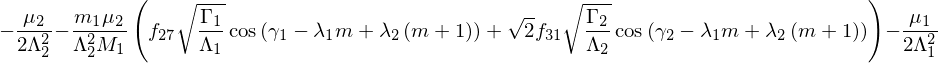

In [4]:
H

Ham = Hamiltonian(H, actionanglepairs)
Ham.integrate(Nparams, ic, times)

H = CMHamiltonian()
H.add_sec(...)
H.add_res(13,8)
Nparams, ic = Ham.vars_from_sim(sim)

class CMHamiltonian(Hamiltonian):
    def __init__(self):
    def add_res():
        self.H += terms

In [6]:
from celmech.hamiltonian import make_Hamiltonian
Hp = make_Hamiltonian(H, actionanglepairs, params)

In [7]:
from celmech.transformations import sim_to_poincare
ic, Nparams = sim_to_poincare(sim, 1, 2, average_synodic_terms=True)

In [8]:
from celmech.disturbing_function import laplace_coefficient 
Nf27 = 1/2*(-2*(m_res+1)*laplace_coefficient(0.5, m_res+1, 0, alpha) - alpha*laplace_coefficient(0.5, m_res+1, 1, alpha))
Nf31 = 1/2*((2*m_res+1)*laplace_coefficient(0.5, m_res, 0, alpha) + alpha*laplace_coefficient(0.5, m_res, 1, alpha))        

In [9]:
hp = Hp(**Nparams, m=m_res, f27=Nf27, f31=Nf31)

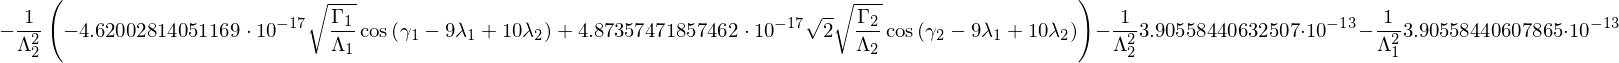

In [10]:
hp.H

In [10]:
%%time
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout, endpoint=False)
symsol = hp.integrate(ic, times)

Nsol = {'Lambda1':np.zeros(Nout), 'Lambda2':np.zeros(Nout), 'lambda1':np.zeros(Nout), 'lambda2':np.zeros(Nout), 
        'Gamma1':np.zeros(Nout), 'Gamma2':np.zeros(Nout), 'gamma1':np.zeros(Nout), 'gamma2':np.zeros(Nout)}
for i, time in enumerate(times):
    sim.integrate(time)
    var, Nparams = sim_to_poincare(sim, 1, 2)
    for key in Nsol.keys():
        Nsol[key][i] = var[key]

CPU times: user 1.25 s, sys: 10.3 ms, total: 1.26 s
Wall time: 1.27 s


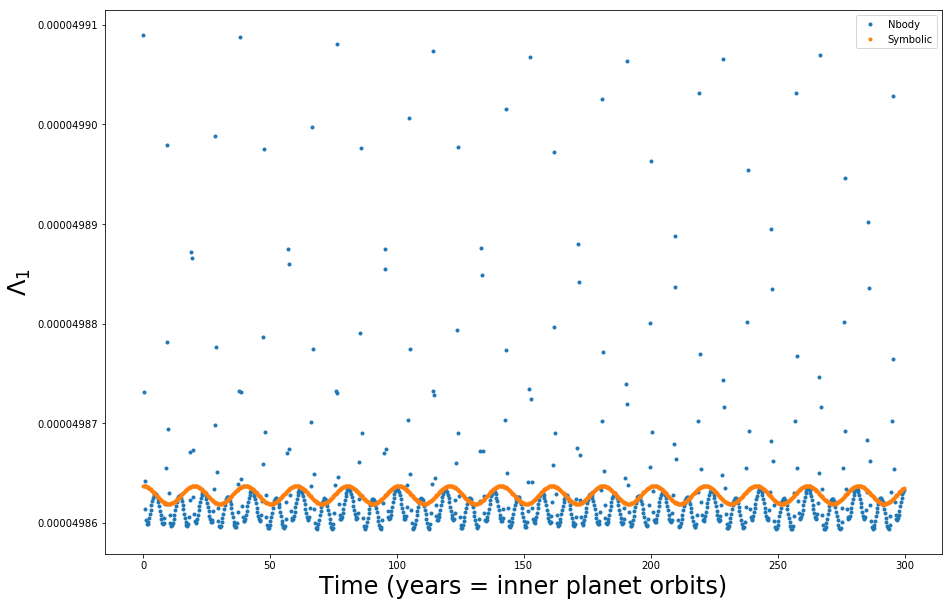

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol['Lambda1'], '.', label='Nbody')
ax.plot(times, symsol['Lambda1'], '.', label='Symbolic')

ax.legend()

In [12]:
from sympy.abc import _clash2
from sympy import sympify
zeta = sympify('zeta', _clash2) 
theta, theta1, Theta, Theta1, zeta = symbols('theta, theta1, Theta, Theta1, {\zeta}') # need to do this trick to get zeta symbol to override sympy zeta function
#Lambda1 = Theta1 - m*Theta
#Lambda2 = (m+1)*Theta
#theta = (m+1)*lambda2 - m*lambda1
#theta1 = lambda1

In [5]:
from sympy import latex, init_printing, Symbol
init_printing(latex)
zeta1 = Symbol('zeta')
#latex(zeta1, symbol_names={zeta1:r'\zeta'})

In [6]:
zeta1.name

'zeta'

In [7]:
zeta1

In [33]:
latex(zeta)

'{\\zeta}'

In [30]:
theta.name

'theta'

In [29]:
repr(zeta)

'{\\zeta}'

In [25]:
zeta.name

'{\\zeta}'

In [13]:
Htheta = H.subs(Lambda1, Theta1 - m*Theta)
Htheta = Htheta.subs(Lambda2, (m+1)*Theta)
Htheta = Htheta.subs(lambda1, theta1)
Htheta = Htheta.subs(lambda2, (theta + m*theta1)/(m+1))

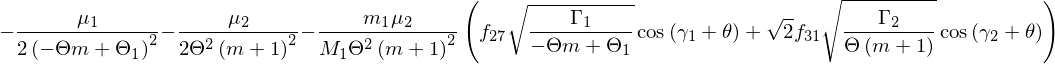

In [14]:
Htheta

In [15]:
# Actionnew = Action/Theta1, Action = Actionnew*Theta1

In [16]:
Htheta = Htheta.subs(Theta, Theta*Theta1)
Htheta = Htheta.subs(Gamma1, Gamma1*Theta1)
Htheta = Htheta.subs(Gamma2, Gamma2*Theta1)

In [17]:
Htheta /= mu2/Theta1**2
Htheta = Htheta.subs(mu1, zeta**3*mu2)
Htheta = simplify(Htheta)

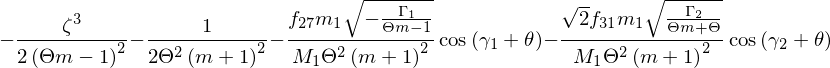

In [18]:
Htheta

In [19]:
#Lambda1, Lambda2, lambda1, lambda2, Gamma1, Gamma2, gamma1, gamma2 = S('Lambda1, Lambda2, lambda1, lambda2, Gamma1, Gamma2, gamma1, gamma2')
actionanglepairs = [(Theta, theta), (Gamma1, gamma1), (Gamma2, gamma2)]
#m1, m2, M1, mu1, mu2, alpha, m, f27, f31 = S('m1, m2, M1, mu1, mu2, alpha, m, f27, f31')
params = [m1, M1, zeta, m, f27, f31]

In [20]:
Htheta = make_Hamiltonian(Htheta, actionanglepairs, params)

In [21]:
def thetas_from_sim(sim, inner, outer, m, average_synodic_terms=False, scales=None):
    var, params = sim_to_poincare(sim, inner, outer, average_synodic_terms=average_synodic_terms)
    params['m'] = m
    params['zeta'] = params['mu1']/params['mu2']
    Theta = var['Lambda2']/(m+1)
    Theta1 = m/(m+1)*var['Lambda2'] + var['Lambda1']
    theta = (m+1)*var['lambda2'] - m*var['lambda1']
    theta1 = var['lambda1']
    
    if scales is None:
        scales = {'actionscale':Theta1, 'timescale':Theta1**3/params['mu2']}
    
    actionscale = scales['actionscale']
    var =  {'Theta':Theta/actionscale, 'Theta1':Theta1/actionscale, 'theta':theta, 'theta1':theta1, 'Gamma1':var['Gamma1']/actionscale, 'Gamma2':var['Gamma2']/actionscale, 'gamma1':var['gamma1'], 'gamma2':var['gamma2']}
    return var, params, scales

In [22]:
sim = make_sim(m_res)

In [23]:
ic, Nparams, scales = thetas_from_sim(sim, 1, 2, m_res, average_synodic_terms=True)
#m=params['m']
#alpha = params['alpha']
#f27 = 1/2*(-2*(m+1)*LaplaceCoefficient(0.5, m+1, alpha, 0) - alpha*LaplaceCoefficient(0.5, m+1, alpha, 1))
#f31 = 1/2*((2*m+1)*LaplaceCoefficient(0.5, m, alpha, 0) + alpha*LaplaceCoefficient(0.5, m, alpha, 1))        

In [24]:
htheta = Htheta(**Nparams, f27=Nf27, f31=Nf31)

AttributeError: Need to pass keyword {\zeta} to Hamiltonian.

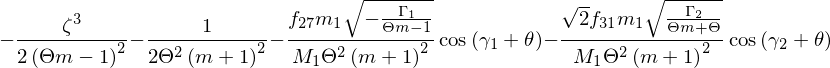

In [35]:
htheta.symH

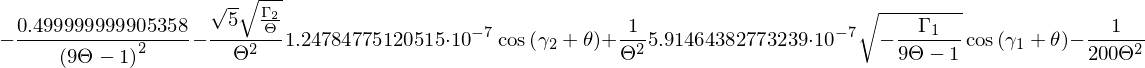

In [36]:
htheta.H

In [37]:
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout, endpoint=False)
timescale = scales['timescale']
normtimes = [t/timescale for t in times]
symsol = htheta.integrate(ic, normtimes)

Nsol = {'Theta':np.zeros(Nout), 'Theta1':np.zeros(Nout), 'theta':np.zeros(Nout), 'theta1':np.zeros(Nout), 
        'Gamma1':np.zeros(Nout), 'Gamma2':np.zeros(Nout), 'gamma1':np.zeros(Nout), 'gamma2':np.zeros(Nout)}
for i, time in enumerate(times):
    sim.integrate(time)
    var, Nparams, scales = thetas_from_sim(sim, 1, 2, m_res, scales=scales)
    for key in Nsol.keys():
        Nsol[key][i] = var[key]

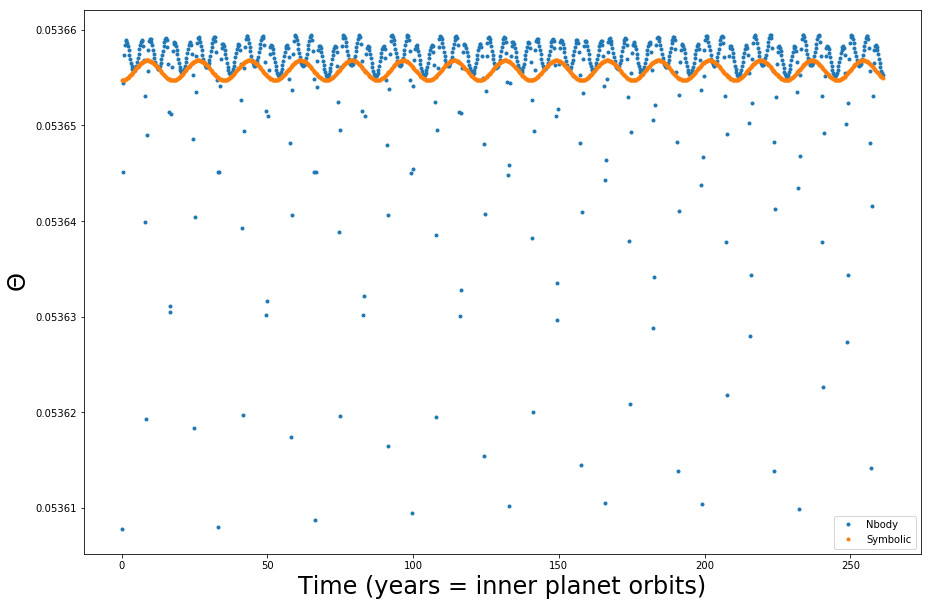

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Theta$", fontsize=24)

ax.plot(normtimes, Nsol['Theta'], '.', label='Nbody')
ax.plot(normtimes, symsol['Theta'], '.', label='Symbolic')

ax.legend()

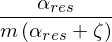

In [67]:
Thetabar, alpha_res = S('Thetabar, alpha_res')
Thetabar = alpha_res/m/(alpha_res + zeta)
Thetabar

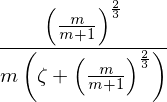

In [68]:
from sympy import series
Thetabar = Thetabar.subs(alpha_res, (m/(m+1))**(S(2)/3))
Thetabar

In [47]:
from sympy import python
python(htheta.symH)

"zeta = Symbol('zeta')\nTheta = Symbol('Theta')\nm = Symbol('m')\nf27 = Symbol('f27')\nm1 = Symbol('m1')\nGamma1 = Symbol('Gamma1')\ngamma1 = Symbol('gamma1')\ntheta = Symbol('theta')\nM1 = Symbol('M1')\nf31 = Symbol('f31')\nGamma2 = Symbol('Gamma2')\ngamma2 = Symbol('gamma2')\ne = -zeta**3/(2*(Theta*m - 1)**2) - 1/(2*Theta**2*(m + 1)**2) - f27*m1*sqrt(-Gamma1/(Theta*m - 1))*cos(gamma1 + theta)/(M1*Theta**2*(m + 1)**2) - sqrt(2)*f31*m1*sqrt(Gamma2/(Theta*m + Theta))*cos(gamma2 + theta)/(M1*Theta**2*(m + 1)**2)"

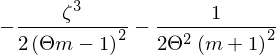

In [48]:
H0 = -zeta**3/(2*(Theta*m - 1)**2) - 1/(2*Theta**2*(m + 1)**2)
H0

dH/d$\Theta$ = 0 at $\bar{\Theta}$

In [61]:
simplify(diff(H0, Theta).subs(Theta, Thetabar))

$\beta$ = d^2H/d$\Theta^2$ at $\bar{\Theta}$ (Deck Eq. 20)

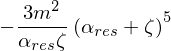

In [75]:
beta = S('beta')
beta = (-3*m**2*(alpha_res + zeta)**5/(zeta*alpha_res))
beta

Check that it's true:

In [76]:
simplify((diff(H0, Theta, 2)-beta.subs(alpha_res, (m/(m+1))**(S(2)/3))).subs(Theta, Thetabar))

In [81]:
Cx0=Symbol('{C_{x_{0}}')
latex(Cx0)

'deltaTheta'

In [26]:
from sympy import symbols
dt = symbols('delta_Theta')
dt

δ_Θ

In [23]:
dt.name

'delta_Theta'

In [17]:
zeta = symbols('{\zeta}')
zeta

In [8]:
from sympy import Symbol
deltaTheta = Symbol('{\delta\Theta}')
deltaTheta

In [9]:
deltaTheta.name

'{\\delta\\Theta}'

In [10]:
dt = Symbol('dt')

In [19]:
from IPython.display import display
init_printing(use_latex='mathjax')
display(latex(dt, symbol_names={dt:r'\delta\Theta'}))

'\\delta\\Theta'

Removing constant piece:

In [ ]:
Hexp,  = S('Hexp')
Hexp = beta/2

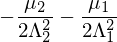

In [25]:
H0 = -mu1/(2*Lambda1**2) - mu2/(2*Lambda2**2)
H0

In [33]:
dL_1, dL_2 = S('dL_1, dL_2')
H0 = -mu1/(2*((2*m1/m2*sqrt(alpha) + dL_1)**2)) - mu2/(2*(2 + dL_2)**2)

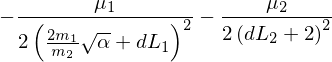

In [34]:
H0

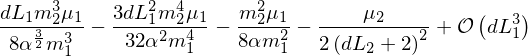

In [54]:
from sympy import series
series(H0, dL_1, 0, 3)

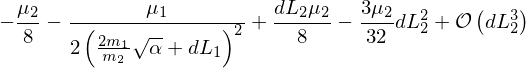

In [56]:
series(H0, dL_2, 0, 3)